In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mínimos con regularización

Garantizando que la matríz $\tilde\phi^T.\tilde\phi$ tenga inversa, se procura incluir un parámetro alpha de valor muy pequeño $0<\alpha<1$ de tal forma que los autovalores de esta matriz no sean cero. Por tanto:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Se reescribe así:

$$\theta_{WLS} = (\tilde{\phi^T}.\tilde{\phi}+\alpha.I)^-1.\tilde{\phi}^T.y_N$$


In [3]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
t = np.linspace([0],[20],100)
pol = [1,-2, 3 , 1]
#y = np.polyval(pol, t) 

# y = np.sin(t-5) 
y = 20*(1-np.exp(-2*t))
r = 1
yn = y + np.random.normal(0,r,t.shape)

## Definiendo el orden deseado si es un modelo polinomial
orden = 5
phi = (t**0)
## Creación del vector phi
for n in range(1,orden+1):
    phi = np.concatenate((t**n, phi), axis=1)

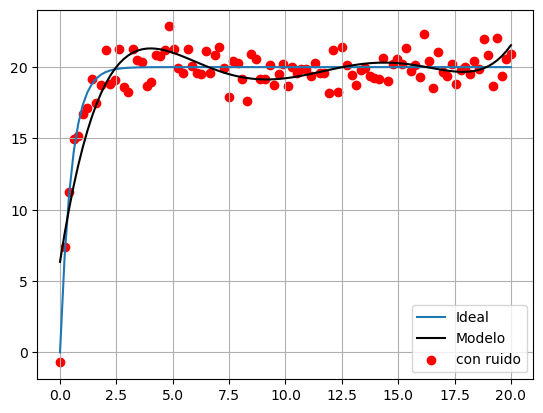

In [4]:
alpha = 0.02             #Valor de regularización
A = np.dot(phi.T,phi)+alpha*np.eye(orden+1)
p_estimado = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
y_estimado = np.polyval(p_estimado,t)
plt.plot(t,y)
plt.plot(t,y_estimado,color = 'black')
plt.scatter(t,yn,color = 'red')
plt.legend(['Ideal','Modelo','con ruido'])
plt.grid()

In [71]:
## Ecuación estimada 
cad = '';
for n in range(0,orden):
    cad = cad+str(p_estimado[n])+'t^'+str(n)+'+'

RECM = np.sqrt(np.dot((yn-y_estimado).T , (yn-y_estimado))/len(t))
cad, RECM

('[0.00022529]t^0+[-0.0129361]t^1+[0.27387384]t^2+[-2.59354824]t^3+[10.48315834]t^4+',
 array([[1.42939223]]))